In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os

In [43]:
path2target = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl/model_17'

In [44]:
tb_dirs = glob(f'{path2target}/tb*')

In [45]:
result = []
for dir in tb_dirs:
    distance = float(dir.split('_')[-1])
    with open(os.path.join(dir, 'log.lammps'), mode='r') as f:
        lines = [s.strip() for s in f.readlines()]
        ew = list(filter(lambda x: ' NNP EW SUMMARY' in x, lines))[0]
        num_ew = int(list(filter(None, ew.split(' ')))[-3])
        result.append([distance, num_ew])
        # print(' ')
    # break

In [46]:
df = pd.DataFrame(data=np.array(result), columns=['distance', 'num_ew'])
df = df.sort_values(by='distance').reset_index(drop=True)

[Text(0.5, 0, 'distance [ang]'), Text(0, 0.5, 'number of extrapolations')]

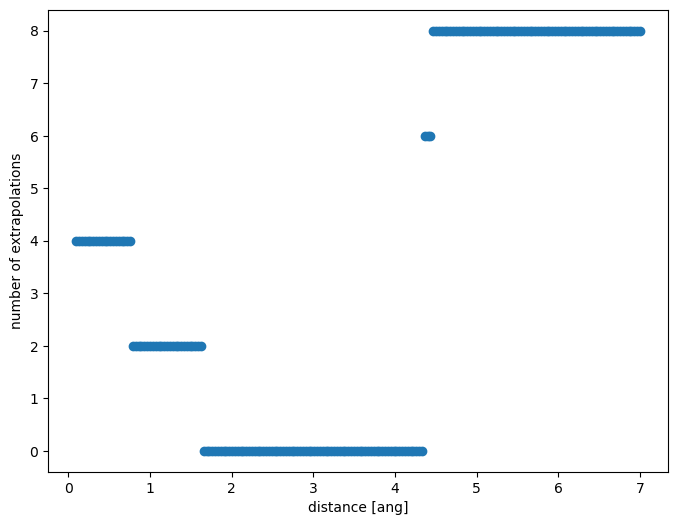

In [47]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(df['distance'], df['num_ew'])
ax.set(xlabel='distance [ang]', ylabel='number of extrapolations')

In [2]:
# During sputtering simulation
with open("/home/k0472/k047207/result/lammps/Si/sputtering/ml/model_19/0deg_200eV/nnp_ew.log", mode='r') as f:
    lines = [s.strip() for s in f.readlines()]

extrapolation_list = []
for l in lines:
    # remove blank from l.split(' ')
    l = [s for s in l.split(' ') if s != '']
    timestep = int(l[6])
    num_extrapolattion = int(l[8])
    extrapolation_list.append([timestep, num_extrapolattion])

extrapolation_df = pd.DataFrame(extrapolation_list, columns=['timestep', 'num_extrapolation'])

In [3]:
extrapolation_df_for_plot = extrapolation_df.query('timestep < 50000')

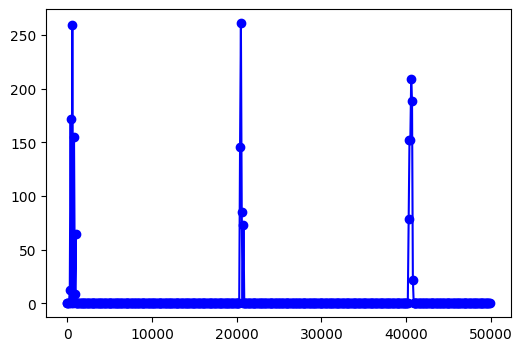

In [5]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(extrapolation_df_for_plot['timestep'], extrapolation_df_for_plot['num_extrapolation'], marker='o', color='blue', label='extrapolation')